In [1]:
#import required libraries
import os             #to get access to input files
import pandas as pd   #to build structured data format and data pre-processing
import numpy as np    #for arrays,fourier transforms and linear algebric operations
import matplotlib.pyplot as plt    #to create visualization of data
from fancyimpute import KNN
from collections import Counter                          #Dictionary to keep track of elements and their count
import seaborn as sns                                    #for visualization of data
from sklearn.model_selection import train_test_split     #to split dataset into training and test
import statsmodels.api as sm                             #to implement Linear Regression model
from sklearn.tree import DecisionTreeRegressor           #to build decision tree regression model
from sklearn.ensemble import RandomForestRegressor       #to build random forest regression model 
from sklearn.neighbors import KNeighborsRegressor        #to build KNN regression model
from sklearn.ensemble import GradientBoostingRegressor   #to build GB regression model
from sklearn.metrics import mean_squared_error           #import metrics to evaluate regression model
from sklearn.metrics import r2_score                     #import metrics to evaluate regression model
from sklearn.model_selection import GridSearchCV         #for hyperparameters tuning
from sklearn.model_selection import RandomizedSearchCV   #for hyperparameters tuning
from pprint import pprint                                #to “pretty-print” data in a well-formatted and more readable way

Using TensorFlow backend.


In [2]:
#Set working directory
os.chdir("C:/Users/Usha/Edwisor/Project-Cab Fare Prediction")
#to check if the working directory is set right
os.getcwd()

'C:\\Users\\Usha\\Edwisor\\Project-Cab Fare Prediction'

In [3]:
#Loading the training and test data set to model and predict values
df_train = pd.read_csv("train_cab.csv",sep=",")
df_test = pd.read_csv("test.csv",sep=",")

## Data Exploration

##### Data Exploration or preparation includes,
1. Identification of variables and their datatypes 
2. Descriptive statistics
2. Conversion of data types into required ones
3. Missing Value Analysis
4. Outlier Analysis
5. Feature Engineering

#### Identification of variables and their datatypes 

In [4]:
#fetch first five observations from training dataset to identify target and predictor variables 
df_train.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1.0
1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1.0
2,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2.0
3,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1.0
4,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1.0


In [5]:
#to fetch first five observations from test dataset
df_test.head()

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-01-27 13:08:24 UTC,-73.973320,40.763805,-73.981430,40.743835,1
1,2015-01-27 13:08:24 UTC,-73.986862,40.719383,-73.998886,40.739201,1
2,2011-10-08 11:53:44 UTC,-73.982524,40.751260,-73.979654,40.746139,1
3,2012-12-01 21:12:12 UTC,-73.981160,40.767807,-73.990448,40.751635,1
4,2012-12-01 21:12:12 UTC,-73.966046,40.789775,-73.988565,40.744427,1


In [6]:
#to get the number of entries or dimensions of the training dataset
df_train.shape

(16067, 7)

In [7]:
#to get the dimensions of the test dataset
df_test.shape

(9914, 6)

In [8]:
#to get the data types of variables in training dataset 
df_train.dtypes

fare_amount           object
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count      float64
dtype: object

In [9]:
#to get the data types of variables in test dataset 
df_test.dtypes

pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [10]:
#to get the count of unique values from training dataset
df_train.nunique()

fare_amount            468
pickup_datetime      16021
pickup_longitude     13789
pickup_latitude      14241
dropoff_longitude    13887
dropoff_latitude     14263
passenger_count         27
dtype: int64

#### Descriptive statistics

In [11]:
#to get total of not null values entries in training dataset
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16067 entries, 0 to 16066
Data columns (total 7 columns):
fare_amount          16043 non-null object
pickup_datetime      16067 non-null object
pickup_longitude     16067 non-null float64
pickup_latitude      16067 non-null float64
dropoff_longitude    16067 non-null float64
dropoff_latitude     16067 non-null float64
passenger_count      16012 non-null float64
dtypes: float64(5), object(2)
memory usage: 878.7+ KB


Observation:

There are null values present in fare_amount and passenger_count columns in training dataset. 

In [12]:
#Distribution of passenger_count for analysis
df_train['passenger_count'].describe()

count    16012.000000
mean         2.625070
std         60.844122
min          0.000000
25%          1.000000
50%          1.000000
75%          2.000000
max       5345.000000
Name: passenger_count, dtype: float64

In [13]:
#to get the list of values of passenger_count
df_train['passenger_count'].value_counts()

1.00       11259
2.00        2322
5.00        1045
3.00         676
4.00         329
6.00         302
0.00          57
43.00          2
53.00          2
0.12           1
1.30           1
531.20         1
345.00         1
456.00         1
87.00          1
55.00          1
58.00          1
236.00         1
535.00         1
536.00         1
537.00         1
554.00         1
5334.00        1
35.00          1
5345.00        1
557.00         1
354.00         1
Name: passenger_count, dtype: int64

Observations:
1. There are rides consisted of even passengers greater than 500 and less than 0. These are clear outliers and points to data inconsistency.
2. Most of the rides consists of passengers either 1 or 2.

In [14]:
#Distribution of fare_amount for analysis
df_train['fare_amount'].describe()

count     16043
unique      468
top         6.5
freq        759
Name: fare_amount, dtype: object

Observations:
1. There are 16043 not null entries in the fare amount variable.
2. There are 468 unique values of fare amount in the training data.

In [15]:
#to get total of not null values entries in test dataset
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9914 entries, 0 to 9913
Data columns (total 6 columns):
pickup_datetime      9914 non-null object
pickup_longitude     9914 non-null float64
pickup_latitude      9914 non-null float64
dropoff_longitude    9914 non-null float64
dropoff_latitude     9914 non-null float64
passenger_count      9914 non-null int64
dtypes: float64(4), int64(1), object(1)
memory usage: 464.8+ KB


Observation:

There are no no null values present in test dataset.

In [16]:
#to get the summary of the training dataset
df_train.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,16067.000000,16067.000000,16067.000000,16067.000000,16012.000000
mean,-72.462787,39.914725,-72.462328,39.897906,2.625070
std,10.578384,6.826587,10.575062,6.187087,60.844122
min,-74.438233,-74.006893,-74.429332,-74.006377,0.000000
25%,-73.992156,40.734927,-73.991182,40.734651,1.000000
50%,-73.981698,40.752603,-73.980172,40.753567,1.000000
75%,-73.966838,40.767381,-73.963643,40.768013,2.000000
max,40.766125,401.083332,40.802437,41.366138,5345.000000


Observations:
1. There are observations in pickup_latitude, dropoff_latitude greater than 400 and less than -90.
2. There are observations in pickup_longitude, dropoff_longitude less than -180.

In [17]:
#to get the summary of test dataset
df_test.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000
mean,-73.974722,40.751041,-73.973657,40.751743,1.671273
std,0.042774,0.033541,0.039072,0.035435,1.278747
min,-74.252193,40.573143,-74.263242,40.568973,1.000000
25%,-73.992501,40.736125,-73.991247,40.735254,1.000000
50%,-73.982326,40.753051,-73.980015,40.754065,1.000000
75%,-73.968013,40.767113,-73.964059,40.768757,2.000000
max,-72.986532,41.709555,-72.990963,41.696683,6.000000


Observations:
1. Passenger count consists of maximum value 6 and minimum value 1 which is within the range. 
2. Pickup and Dropoff latitudes and longitudes are not greater than 42 and -72 which is acceptable range for latitudes and longitudes. 

#### Conversion of data types of variables into the required ones

In [18]:
#to get missing values present in 'fare_amount' variable
df_train['fare_amount'].isnull().sum()

24

In [19]:
#convert data type of 'fare_amount' from object to numeric.Using errors=’coerce’ will replace all non-numeric values with NaN.
df_train['fare_amount'] = pd.to_numeric(df_train['fare_amount'],errors = "coerce") 

In [20]:
#to check if non-numeric values have been replaced in 'fare_amount' variable
df_train['fare_amount'].isnull().sum()

25

In [21]:
#convert data type of 'pickup_datetime' from object to datetime
df_train['pickup_datetime'] = pd.to_datetime(df_train['pickup_datetime'],format= "%Y-%m-%d %H:%M:%S UTC")

ValueError: time data '43' does not match format '%Y-%m-%d %H:%M:%S UTC' (match)

In [22]:
#to get the observation which contains pickup_datetime as '43'
df_train[df_train['pickup_datetime']== "43"]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
1327,11.5,43,-73.981947,40.7282,-73.988582,40.759202,1.0


It is obvious that pickup datetime can't be "43", we can remove the observation as it is incorrectly entered.

In [23]:
#Drop the observation that has value of 'pickup_datetime' as 43
df_train = df_train.drop(df_train[df_train['pickup_datetime'] == "43"].index,axis=0)

In [24]:
#convert data type of 'pickup_datetime' from object to datetime(for training dataset)
df_train['pickup_datetime'] = pd.to_datetime(df_train['pickup_datetime'],format= "%Y-%m-%d %H:%M:%S UTC")

In [25]:
#check the data types of training dataset after conversion 
df_train.dtypes

fare_amount                 float64
pickup_datetime      datetime64[ns]
pickup_longitude            float64
pickup_latitude             float64
dropoff_longitude           float64
dropoff_latitude            float64
passenger_count             float64
dtype: object

In [26]:
#convert data type of 'pickup_datetime' from object to datetime(for test dataset)
df_test['pickup_datetime'] = pd.to_datetime(df_test['pickup_datetime'],format= "%Y-%m-%d %H:%M:%S UTC")

In [27]:
#check the data types of test dataset after conversion 
df_test.dtypes

pickup_datetime      datetime64[ns]
pickup_longitude            float64
pickup_latitude             float64
dropoff_longitude           float64
dropoff_latitude            float64
passenger_count               int64
dtype: object

We will have to convert passenger_count into a categorical variable because passenger_count is not a continuous variable. passenger_count cannot take continous values. and also they are limited in number if its a cab. It can be done after missing and outlier analysis are done.

#### Missing value Analysis

In [28]:
#to get the sum of null/missing values in training set
df_train.isnull().sum()

fare_amount          25
pickup_datetime       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
passenger_count      55
dtype: int64

In [29]:
#create dataframe to analyze missing values in training dataset
missing_val = pd.DataFrame(df_train.isnull().sum())
missing_val = missing_val.rename(columns = {0 : 'Missing_count'})
missing_val['Percent'] = (missing_val['Missing_count']/len(df_train)) * 100
missing_val = missing_val.sort_values('Percent',ascending=False)
missing_val

,Missing_count,Percent
passenger_count,55,0.342338
fare_amount,25,0.155608
pickup_datetime,0,0.000000
pickup_longitude,0,0.000000
pickup_latitude,0,0.000000
dropoff_longitude,0,0.000000
dropoff_latitude,0,0.000000


Since the percentage of missing values of passenger_count and fare_amount in training dataset is less, we can impute the missing values statistically.
However, there are no missing values present in test dataset.

Imputation of missing values in training dataset:
Imputation is a method to fill in the missing values with estimated ones. Mean / Mode / Median imputation is one of the most frequently used methods. It consists of replacing the missing data for a given attribute by the mean or median (quantitative attribute) or mode (qualitative attribute) of all known values of that variable.

Since, fare_amount and passenger_count are numerical and categorical, we can opt for Mean/Median/Mode and KNN methods for imputation. To find the apt method out of all,
1. Remove any random value from the column missing and replace with NA.
2. Impute the null value with methods one by one.
3. Select the method with output nearly equal to the original value.

1. Passenger count

In [30]:
#Choosing a random value from passenger_count to replace it as NA
df_train['passenger_count'].iloc[100]

1.0

In [31]:
#Replace 1.0 with NA
df_train['passenger_count'].iloc[100] = np.nan
df_train['passenger_count'].iloc[100]

C:\Users\Usha\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


nan

In [32]:
#Impute with mode
df_train["passenger_count"].fillna(df_train["passenger_count"].mode()[0]).iloc[100]

1.0

Here, after imputation, the values are:

Actual value - 1

After Mode Imputation - 1

After KNN Imputation - 2

We can't use mode method as data will be more biased towards passenger_count = 1 as it's proportion is high in dataset.

2. Fare amount

In [33]:
#Choosing a random fare_amount value to replace it as NA
df_train['fare_amount'].iloc[200]

6.0

In [34]:
#Replace 6.0 with NA
df_train['fare_amount'].iloc[200] = np.nan
df_train['fare_amount'].iloc[200]

nan

In [35]:
#Impute with mean
df_train['fare_amount'].fillna(df_train['fare_amount'].mean()).iloc[200]

15.015785536159441

In [36]:
#Impute with median
df_train['fare_amount'].fillna(df_train['fare_amount'].median()).iloc[200]

8.5

Here, after imputation, the values are:

Actual value = 6.0

After Mean Imputation - 15.01

After Median Imputation - 8.5

After KNN Imputation - 6.32

We will go for KNN Imputations to impute both passenger_count and fare_amount missing values.

In [37]:
#to get the observations with missing values in passenger_count
df_train[df_train['passenger_count'].isnull()]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
31,22.54,2015-06-21 21:46:34,-74.010483,40.717667,-73.985771,40.660366,NaN
64,7.30,2011-11-07 10:47:40,-74.003919,40.753019,-73.992368,40.735362,NaN
82,8.50,2013-06-14 08:27:43,-73.953710,40.790813,-73.957015,40.777676,NaN
97,9.00,2014-12-07 12:26:00,-73.984977,40.752122,-74.000925,40.757982,NaN
100,10.00,2014-11-12 12:40:29,-74.002581,40.739572,-73.994580,40.760682,NaN
112,35.00,2012-12-06 18:05:00,-73.953310,40.787772,-73.944352,40.719772,NaN
133,10.50,2012-02-03 13:46:35,-73.988006,40.737723,-73.965699,40.766095,NaN
150,17.30,2010-05-17 07:44:00,-73.950972,40.785633,-74.010240,40.720302,NaN
174,10.50,2015-02-27 07:50:56,-73.944023,40.775959,-73.955048,40.785080,NaN
195,16.00,2014-02-05 00:28:00,-73.996652,40.744495,-73.980253,40.737635,NaN


In [38]:
#to get the observations with missing values in fare_amount
df_train[df_train['fare_amount'].isnull()]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
8,NaN,2012-12-03 13:10:00,-74.006462,40.726713,-73.993078,40.731628,1.0
26,NaN,2011-02-07 20:01:00,0.000000,0.000000,0.000000,0.000000,1.0
69,NaN,2015-05-12 23:51:42,-73.954796,40.779335,-73.944931,40.780087,1.0
126,NaN,2013-09-17 04:22:00,-73.987210,40.729325,-73.931985,40.697207,1.0
168,NaN,2009-01-16 21:10:00,-73.994143,40.751193,-73.988897,40.759742,1.0
200,NaN,2013-10-05 09:12:21,-74.000310,40.747961,-73.993636,40.757229,1.0
240,NaN,2009-06-20 19:28:37,-73.979345,40.776630,-73.973842,40.757074,1.0
305,NaN,2014-07-11 05:07:00,-73.951660,40.772657,-74.010583,40.721405,2.0
350,NaN,2014-09-05 15:23:00,-73.968260,40.765140,-73.961115,40.774882,6.0
413,NaN,2013-09-12 11:32:00,-73.982060,40.772705,-73.956213,40.771777,55.0


we will have to pass variables except pickup_datetime from the training dataset for KNN Imputation.

In [39]:
#Extracting columns except pickup_datetime and storing it as seperate dataframe
columns=['fare_amount', 'pickup_longitude', 'pickup_latitude','dropoff_longitude', 'dropoff_latitude', 'passenger_count']
pickup_datetime=pd.DataFrame(df_train['pickup_datetime'])

#KNN Imputation
df_train = pd.DataFrame(KNN(k = 19).fit_transform(df_train.drop('pickup_datetime',axis=1)),columns = columns, index=df_train.index)

Imputing row 1/16066 with 0 missing, elapsed time: 87.309
Imputing row 101/16066 with 1 missing, elapsed time: 90.299
Imputing row 201/16066 with 1 missing, elapsed time: 90.309
Imputing row 301/16066 with 0 missing, elapsed time: 90.314
Imputing row 401/16066 with 0 missing, elapsed time: 90.316
Imputing row 501/16066 with 0 missing, elapsed time: 90.320
Imputing row 601/16066 with 0 missing, elapsed time: 90.324
Imputing row 701/16066 with 0 missing, elapsed time: 90.328
Imputing row 801/16066 with 0 missing, elapsed time: 90.333
Imputing row 901/16066 with 0 missing, elapsed time: 90.336
Imputing row 1001/16066 with 0 missing, elapsed time: 90.339
Imputing row 1101/16066 with 0 missing, elapsed time: 90.341
Imputing row 1201/16066 with 0 missing, elapsed time: 90.343
Imputing row 1301/16066 with 0 missing, elapsed time: 90.344
Imputing row 1401/16066 with 0 missing, elapsed time: 90.348
Imputing row 1501/16066 with 0 missing, elapsed time: 90.350
Imputing row 1601/16066 with 0 missi

In [40]:
#to check if the missing values in passenger_count are imputed 
df_train[df_train['passenger_count'].isnull()]

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count


In [41]:
#to check if the missing values in fare_amount are imputed 
df_train[df_train['fare_amount'].isnull()]

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count


In [42]:
#to check for null values after removing missing value rows
df_train.isnull().sum()

fare_amount          0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

#### Outlier analysis 

Outliers are the values that are not in the desired range. Based on the basic understanding of the data from Descriptive statistics, it is obvious that the outliers present in the training data are due to incorrectly entered or measured data. Hence, we can remove those values.

1. Pickup and Dropoff latitudes and longitudes

Observation:

pickup and dropoff latitude should be in the range of -90 to +90 and pickup and dropoff longitude should be in the range of -180 to +180. Hence, rows having pickup and dropoff latitude, longitude values out of the given range should be considered as outliers.

In [43]:
#fetch rows having pickup_latitude less than -90
df_train[df_train['pickup_latitude'] < -90]

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count


In [44]:
#fetch rows having pickup_latitude greater than 90
df_train[df_train['pickup_latitude'] > 90]

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
5686,3.3,-73.947235,401.083332,-73.951392,40.778927,1.0


In [45]:
#Drop the row whose pickup_latitude > 90
df_train = df_train.drop(df_train[df_train['pickup_latitude'] > 90].index,axis=0)

In [46]:
#fetch rows having dropoff_latitude less than -90
df_train[df_train['dropoff_latitude'] < -90]

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count


In [47]:
#fetch rows having dropoff_latitude greater than 90
df_train[df_train['dropoff_latitude'] > 90]

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count


In [48]:
#fetch rows having pickup_longitude less than -180
df_train[df_train['pickup_longitude'] < -180]

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count


In [49]:
#fetch rows having pickup_longitude greater than 180
df_train[df_train['pickup_longitude'] > 180]

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count


In [50]:
#fetch rows having dropoff_longitude less than -180
df_train[df_train['dropoff_longitude'] < -180]

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count


In [51]:
#fetch rows having dropoff_longitude greater than 180
df_train[df_train['dropoff_longitude'] > 180]

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count


In [52]:
df_train.shape

(16065, 6)

Thus, pickup, dropoff latitude and longitude variables are within the range in training dataset and there are no outliers in pickup, dropoff latitude and longitude variables in test dataset.

2. Passenger count

Observations:

1.Maximum number of passengers that can travel in a car can be only 6. Hence, values greater than 6 are outliers.

2.Passenger count cannot be 0. Hence, any value less than or equal to zero is an outlier.

In [53]:
#get the rows whose passenger_count values are greater than 6
df_train[df_train['passenger_count'] > 6]

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
203,11.300000,-73.993973,40.746577,-74.005060,40.709365,57.781841
233,8.500000,0.000000,0.000000,0.000000,0.000000,236.000000
263,4.900000,-73.983249,40.734655,-73.991278,40.738918,456.000000
293,6.100000,-74.006642,40.738927,-74.010828,40.717907,5334.000000
356,8.500000,-73.992108,40.764203,-73.973000,40.762695,535.000000
386,8.100000,-73.960853,40.761557,-73.976335,40.748361,354.000000
413,7.519124,-73.982060,40.772705,-73.956213,40.771777,55.000000
971,10.100000,-74.004500,40.742143,-73.994330,40.720412,554.000000
1007,3.700000,-73.969157,40.759000,-73.968763,40.764617,53.000000
1043,5.700000,-73.973573,40.760184,-73.953564,40.767392,35.000000


In [54]:
#remove rows whose passenger_count is greater than 6
df_train = df_train.drop(df_train[df_train['passenger_count'] > 6].index,axis=0)

In [55]:
df_train[df_train['passenger_count'] > 6]

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count


In [56]:
#get the rows whose passenger_count values are less than 0
df_train[df_train['passenger_count'] < 0]

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count


In [57]:
#get the rows whose passenger_count values are 0
df_train[df_train['passenger_count'] == 0]

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
314,34.0,-73.974899,40.751095,-73.908546,40.881878,0.0
566,4.9,-73.955322,40.782840,-73.955797,40.773673,0.0
678,6.5,-73.983397,40.738183,-73.971395,40.758023,0.0
1160,13.3,-73.998360,40.740348,-73.946455,40.777348,0.0
1935,10.1,-73.971400,40.795000,-73.967900,40.768600,0.0
2200,8.1,-73.988008,40.748303,-74.005185,40.738733,0.0
2425,8.9,-73.999900,40.738600,-73.971800,40.746300,0.0
3034,5.7,-73.986557,40.745783,-73.994545,40.729995,0.0
3413,7.3,-73.973413,40.743708,-73.985220,40.741583,0.0
3481,11.3,-73.968100,40.762500,-73.984400,40.760900,0.0


In [58]:
#remove rows whose passenger_count is equal to 0
df_train = df_train.drop(df_train[df_train['passenger_count'] == 0].index,axis=0)

In [59]:
df_train[df_train['passenger_count'] == 0]

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count


In [60]:
df_train['passenger_count'].describe()

count    15987.000000
mean         1.650348
std          1.264432
min          0.120000
25%          1.000000
50%          1.000000
75%          2.000000
max          6.000000
Name: passenger_count, dtype: float64

Clearly, the minimum value 0.12 is an outlier.

In [61]:
#remove passenger_count value 0.12
df_train = df_train.drop(df_train[df_train['passenger_count'] == 0.12].index,axis=0)

In [62]:
df_train['passenger_count'].describe()

count    15986.000000
mean         1.650444
std          1.264413
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          6.000000
Name: passenger_count, dtype: float64

Now, maximum and minimum values of passenger_count are within the range.

3. Fare amount

In [63]:
df_train['fare_amount'].describe()

count    15986.000000
mean        15.037743
std        431.214021
min         -3.000000
25%          6.000000
50%          8.500000
75%         12.500000
max      54343.000000
Name: fare_amount, dtype: float64

Observation:

Fare amount can't be zero or less than that. Hence, values less than or equal to 0 are outliers.

In [64]:
#to get rows having fare_amount less than 0
df_train[df_train['fare_amount'] < 0]

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
2039,-2.9,-73.789450,40.643498,-73.788665,40.641952,1.0
2486,-2.5,-74.000031,40.720631,-73.999809,40.720539,1.0
13032,-3.0,-73.995062,40.740755,-73.995885,40.741357,4.0


In [65]:
#remove rows with fare_amount value less than 0
df_train = df_train.drop(df_train[df_train['fare_amount'] < 0].index,axis=0)

In [66]:
df_train[df_train['fare_amount'] < 0]

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count


In [67]:
#to get rows having fare_amount equal to 0
df_train[df_train['fare_amount'] == 0]

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
10002,0.0,-73.987115,40.738808,-74.005911,40.71396,1.0


In [68]:
#remove rows with fare_amount value equal to 0
df_train = df_train.drop(df_train[df_train['fare_amount'] == 0].index,axis=0)

In [69]:
df_train[df_train['fare_amount'] == 0]

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count


In [70]:
#arrange fare_amount in descending order to get outliers from fare_amount 
df_train["fare_amount"].sort_values(ascending=False)

1015     54343.00
1072      4343.00
607        453.00
980        434.00
1335       180.00
1483       165.00
6630       128.83
14142      108.00
12349      104.67
12915       96.00
7810        95.00
9431        88.00
10077       87.30
12614       87.00
4620        85.50
14519       82.50
12437       80.75
2639        79.00
4013        77.70
13962       77.15
2013        77.00
6668        76.80
8363        76.00
10524       75.80
11019       75.33
13615       75.00
15023       73.30
1494        70.00
4118        69.70
9651        66.30
           ...   
6226         2.50
376          2.50
14530        2.50
4084         2.50
3427         2.50
13221        2.50
8603         2.50
10705        2.50
14574        2.50
8795         2.50
1419         2.50
14633        2.50
10111        2.50
13571        2.50
11062        2.50
12343        2.50
7728         2.50
15257        2.50
1774         2.50
6002         2.50
3558         2.50
226          2.50
15370        2.50
4321         2.50
6007      

Now, there is a huge difference in the fare amounts of first two observations and the rest of the dataset. We can remove them as they are outliers. 

In [71]:
#remove rows with fare_amount value greater than 454
df_train = df_train.drop(df_train[df_train['fare_amount'] > 454].index,axis=0)

In [72]:
df_train['fare_amount'].describe()

count    15980.000000
mean        11.371450
std         10.802367
min          0.010000
25%          6.000000
50%          8.500000
75%         12.500000
max        453.000000
Name: fare_amount, dtype: float64

In [73]:
#fetch the minimum value of fare_amount
df_train['fare_amount'].min()

0.01

In [74]:
#remove fare_amount minimum value 0.01 as value can never be this low
df_train = df_train.drop(df_train[df_train['fare_amount'] == 0.01].index,axis=0)

In [75]:
df_train['fare_amount'].describe()

count    15979.000000
mean        11.372161
std         10.802331
min          1.140000
25%          6.000000
50%          8.500000
75%         12.500000
max        453.000000
Name: fare_amount, dtype: float64

Now, maximum and minimum values of fare amount are in the range.

Hence, there are no outliers present in fare_amount in training dataset. There are no missing values and outliers present in test dataset.

#### Feature Engineering

###### Feature creation

1. Distance

We have latitude and longitude coordinates. Thus we can calculate distance between the coordinates.
This can be done based on haversine formula. The haversine formula determines the great-circle distance between two points on a sphere given their longitudes and latitudes. Here, we create a new derived feature - distance. 

In [76]:
#Calculate distance based on latitude and longitude coordinates.  
from math import radians, cos, sin, asin, sqrt

def haversine(a):
    lon1=a[0]
    lat1=a[1]
    lon2=a[2]
    lat2=a[3]
    
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    
    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c =  2 * asin(sqrt(a))
    # Radius of earth in kilometers is 6371
    km = 6371* c
    return km

In [77]:
#apply haversine function to training dataset
df_train['distance'] = df_train[['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude']].apply(haversine,axis=1)

In [78]:
df_train.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance
0,4.5,-73.844311,40.721319,-73.841610,40.712278,1.0,1.030764
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1.0,8.450134
2,5.7,-73.982738,40.761270,-73.991242,40.750562,2.0,1.389525
3,7.7,-73.987130,40.733143,-73.991567,40.758092,1.0,2.799270
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1.0,1.999157


In [79]:
#apply haversine function to test dataset
df_test['distance'] = df_test[['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude']].apply(haversine,axis=1)

In [80]:
df_test.head()

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance
0,2015-01-27 13:08:24,-73.973320,40.763805,-73.981430,40.743835,1,2.323259
1,2015-01-27 13:08:24,-73.986862,40.719383,-73.998886,40.739201,1,2.425353
2,2011-10-08 11:53:44,-73.982524,40.751260,-73.979654,40.746139,1,0.618628
3,2012-12-01 21:12:12,-73.981160,40.767807,-73.990448,40.751635,1,1.961033
4,2012-12-01 21:12:12,-73.966046,40.789775,-73.988565,40.744427,1,5.387301


In [81]:
#to get the distribution of distance in training dataset
df_train['distance'].describe()

count    15979.000000
mean        15.013064
std        310.981551
min          0.000000
25%          1.215276
50%          2.125365
75%          3.853301
max       8667.542104
Name: distance, dtype: float64

In [82]:
#to get the distribution of distance in test dataset
df_test['distance'].describe()

count    9914.000000
mean        3.435371
std         3.972374
min         0.000000
25%         1.298277
50%         2.217412
75%         4.045302
max        99.996040
Name: distance, dtype: float64

In [83]:
#arrange distance values in descending order to find whether outliers are present or not
df_train['distance'].sort_values(ascending = False)

9147     8667.542104
8647     8667.497512
2397     8667.454421
472      8667.304968
11653    8666.701504
13340    8666.613646
10215    8666.584706
4597     8666.566030
10458    8665.976222
10672    8665.702390
10488    8665.555634
1260     8665.268588
4278     8665.223767
6188     8664.191488
12983    8664.131808
6302     8663.039123
12705    8661.362152
14197    8657.136619
15783    8656.714168
15749    6028.926779
2280     6026.494216
5864     5420.988959
7014     4447.086698
10710     129.950482
14536     129.560455
11619     127.509261
12228     123.561157
5663      101.094619
1684       99.771579
3075       97.985088
            ...     
6150        0.000000
13264       0.000000
3587        0.000000
11313       0.000000
7982        0.000000
11326       0.000000
1542        0.000000
13239       0.000000
6177        0.000000
10085       0.000000
4559        0.000000
13298       0.000000
13304       0.000000
5228        0.000000
8109        0.000000
8130        0.000000
15418       0

Observations:

We get to know that there is a drop in the value of distance from 4447.08 to 129.95 and there is no increase after it. Hence,
1. Distance values greater than 130 could be considered as outliers and removed.
2. Distance cannot be zero. The rows containing distance equal to 0 can also be dropped.

In [84]:
#drop rows whose distance value is equal to zero 
df_train = df_train.drop(df_train[df_train['distance'] == 0].index,axis=0)

In [85]:
df_train.shape

(15523, 7)

In [86]:
#drop rows whose distance value is greater than 130 (rounding off 129.95 max value)
df_train = df_train.drop(df_train[df_train['distance'] > 130].index,axis=0)

In [87]:
df_train.shape

(15500, 7)

In [88]:
#arrange distance values in descending order to ensure there are no outliers
df_train['distance'].sort_values(ascending=False)

10710    129.950482
14536    129.560455
11619    127.509261
12228    123.561157
5663     101.094619
1684      99.771579
3075      97.985088
9899      97.670590
4487      95.852036
9808      93.925599
7401      92.605848
12349     43.648755
649       39.476975
6308      37.812945
4118      32.602535
7021      29.478280
6677      26.369072
4567      25.735917
8105      24.690884
15023     24.125745
15178     23.814940
14099     23.696200
12433     23.513721
8259      23.445758
4268      23.196680
3216      23.184092
4299      23.168706
12941     23.114168
13804     23.077267
538       23.066627
            ...    
6002       0.004982
8773       0.004829
15530      0.004709
14530      0.004059
184        0.003982
8371       0.003434
3645       0.003173
14633      0.003069
5593       0.003054
14475      0.002842
9928       0.002838
1494       0.002733
9012       0.002693
4058       0.002687
8734       0.002616
616        0.002507
10258      0.002235
15370      0.002234
8603       0.002232


In [89]:
#arrange distance values in descending order to check for oultiers in test dataset
df_test['distance'].sort_values(ascending=False)

4080    99.996040
8529    98.192419
5887    97.240975
7269    33.604366
4334    28.837177
3569    27.863332
5115    27.653128
9391    27.287881
4864    27.169511
706     25.565980
2487    25.364627
5865    23.443658
5357    23.120250
5905    23.099448
2175    23.051119
8173    22.640229
7787    22.474632
2718    22.407984
248     22.344419
5373    22.132067
8825    22.113966
7346    22.080922
6260    22.064573
628     21.880433
5523    21.880030
7000    21.845869
8876    21.811484
8944    21.785143
7857    21.782684
4018    21.738063
          ...    
121      0.000000
2641     0.000000
1218     0.000000
1429     0.000000
7839     0.000000
451      0.000000
981      0.000000
2675     0.000000
1409     0.000000
7874     0.000000
6954     0.000000
976      0.000000
2618     0.000000
498      0.000000
5443     0.000000
8426     0.000000
8424     0.000000
491      0.000000
318      0.000000
1189     0.000000
2247     0.000000
2936     0.000000
6157     0.000000
9221     0.000000
860      0

In [90]:
#to get the count of distance value equal to 0 in test dataset
Counter(df_test['distance']==0)

Counter({False: 9829, True: 85})

In [91]:
df_test.shape

(9914, 7)

In [92]:
#drop rows whose distance value is equal to 0
df_test = df_test.drop(df_test[df_test['distance'] == 0].index,axis=0)

In [93]:
df_test.shape

(9829, 7)

In [94]:
df_test['distance'].sort_values(ascending=False)

4080    99.996040
8529    98.192419
5887    97.240975
7269    33.604366
4334    28.837177
3569    27.863332
5115    27.653128
9391    27.287881
4864    27.169511
706     25.565980
2487    25.364627
5865    23.443658
5357    23.120250
5905    23.099448
2175    23.051119
8173    22.640229
7787    22.474632
2718    22.407984
248     22.344419
5373    22.132067
8825    22.113966
7346    22.080922
6260    22.064573
628     21.880433
5523    21.880030
7000    21.845869
8876    21.811484
8944    21.785143
7857    21.782684
4018    21.738063
          ...    
7039     0.057109
1686     0.055740
7723     0.055065
6005     0.050825
4523     0.049704
2364     0.049493
7731     0.049473
2988     0.042502
9827     0.036522
4786     0.035839
4023     0.035212
1928     0.035158
545      0.034713
4676     0.031828
3656     0.030301
8175     0.029933
7719     0.025309
104      0.025130
7068     0.024403
9367     0.023768
2974     0.014678
3233     0.014187
5669     0.012239
525      0.009642
4608     0

Thus, there are no outliers in distance variable in both training and test datasets.

2. Year, Month, Day, Date, Hour

Now, we have pickup_datetime feature with us. We can generate new variables like year, month, date, day, hour from it which might have better relationship with our target variable. This also helps to highlight the hidden relationship in a variable.

In [95]:
#deriving new variables from pickup_datetime in training dataset.
df_train['pickup_year'] = pickup_datetime['pickup_datetime'].dt.year.astype("category")
df_train['pickup_month'] = pickup_datetime['pickup_datetime'].dt.month.astype("category")
df_train['pickup_date'] = pickup_datetime['pickup_datetime'].dt.day.astype("category")
df_train['pickup_day'] = pickup_datetime['pickup_datetime'].dt.dayofweek.astype("category")
df_train['pickup_hour'] = pickup_datetime['pickup_datetime'].dt.hour.astype("category")
df_train.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance,pickup_year,pickup_month,pickup_date,pickup_day,pickup_hour
0,4.5,-73.844311,40.721319,-73.841610,40.712278,1.0,1.030764,2009,6,15,0,17
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1.0,8.450134,2010,1,5,1,16
2,5.7,-73.982738,40.761270,-73.991242,40.750562,2.0,1.389525,2011,8,18,3,0
3,7.7,-73.987130,40.733143,-73.991567,40.758092,1.0,2.799270,2012,4,21,5,4
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1.0,1.999157,2010,3,9,1,7


In [96]:
#converting datatype of passenger_count in training dataset
df_train['passenger_count']=df_train['passenger_count'].astype('int')
df_train['passenger_count'] = df_train['passenger_count'].astype("category")

In [97]:
df_train.dtypes

fare_amount           float64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
passenger_count      category
distance              float64
pickup_year          category
pickup_month         category
pickup_date          category
pickup_day           category
pickup_hour          category
dtype: object

In [98]:
#deriving new variables from pickup_datetime in test dataset.
df_test['pickup_year'] = df_test['pickup_datetime'].dt.year.astype("category")
df_test['pickup_month'] = df_test['pickup_datetime'].dt.month.astype("category")
df_test['pickup_date'] = df_test['pickup_datetime'].dt.day.astype("category")
df_test['pickup_day'] = df_test['pickup_datetime'].dt.dayofweek.astype("category")
df_test['pickup_hour'] = df_test['pickup_datetime'].dt.hour.astype("category")

In [99]:
df_test.head()

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance,pickup_year,pickup_month,pickup_date,pickup_day,pickup_hour
0,2015-01-27 13:08:24,-73.973320,40.763805,-73.981430,40.743835,1,2.323259,2015,1,27,1,13
1,2015-01-27 13:08:24,-73.986862,40.719383,-73.998886,40.739201,1,2.425353,2015,1,27,1,13
2,2011-10-08 11:53:44,-73.982524,40.751260,-73.979654,40.746139,1,0.618628,2011,10,8,5,11
3,2012-12-01 21:12:12,-73.981160,40.767807,-73.990448,40.751635,1,1.961033,2012,12,1,5,21
4,2012-12-01 21:12:12,-73.966046,40.789775,-73.988565,40.744427,1,5.387301,2012,12,1,5,21


In [100]:
#converting datatype of passenger_count in test datase
df_test['passenger_count']=df_test['passenger_count'].astype('int')
df_test['passenger_count'] = df_test['passenger_count'].astype("category")

In [101]:
df_test.dtypes

pickup_datetime      datetime64[ns]
pickup_longitude            float64
pickup_latitude             float64
dropoff_longitude           float64
dropoff_latitude            float64
passenger_count            category
distance                    float64
pickup_year                category
pickup_month               category
pickup_date                category
pickup_day                 category
pickup_hour                category
dtype: object

In [102]:
#dropvar_train = ['pickup_datetime', 'pickup_longitude', 'pickup_latitude','dropoff_longitude', 'dropoff_latitude']
#df_train = df_train.drop(dropvar_train, axis = 1)

##### Data Visualization

Data visualization helps us to understand the relationship between features. Here, to understand how each independent feature is related to the target feature, we need to perform visualization on data.

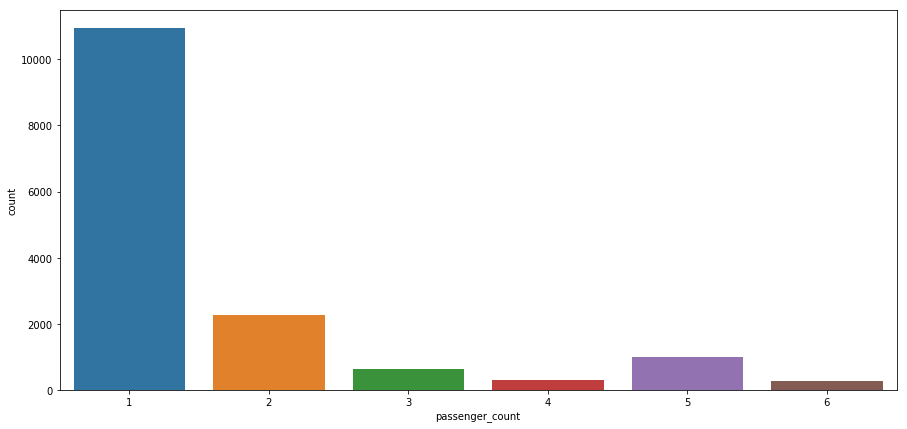

In [103]:
#impact of passenger_count on number of cab rides 
plt.figure(figsize=(15,7))
sns.countplot(x="passenger_count", data=df_train)

We can observe that 1 (single) passengers are the most frequent travellers

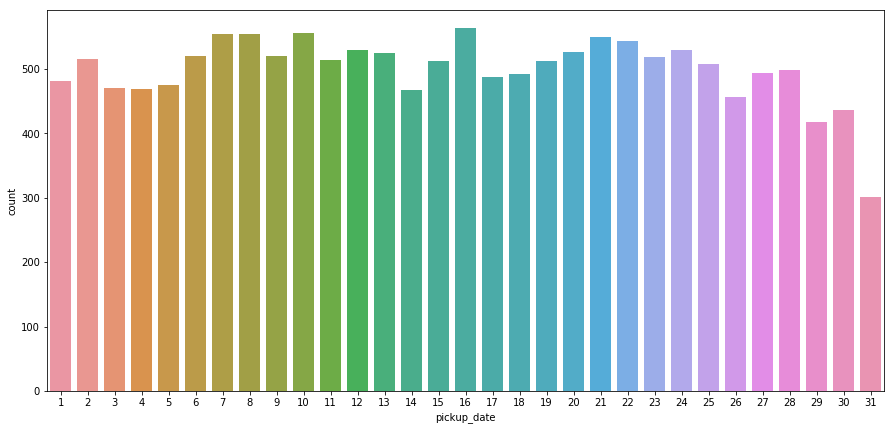

In [104]:
#impact of pickup_date on number of cab rides 
plt.figure(figsize=(15,7))
sns.countplot(x="pickup_date", data=df_train)

We can observe that pickup_date doesn't impact much on the rides.

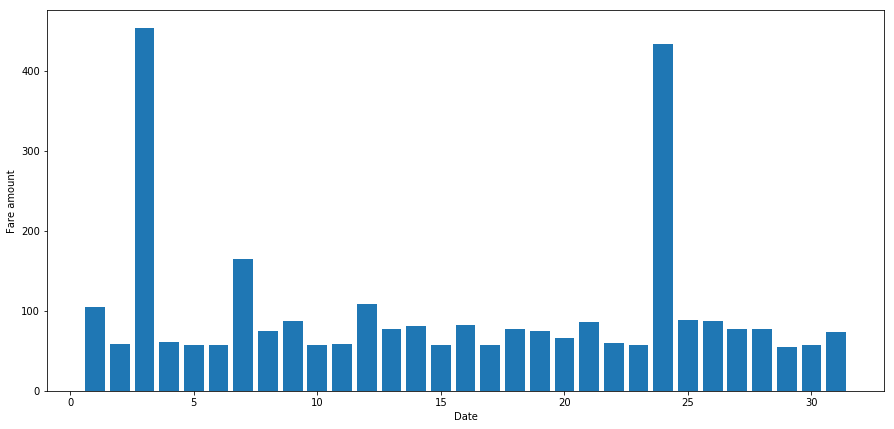

In [105]:
#Relationship between passengers and the fare amount
plt.figure(figsize=(15,7))
plt.bar(df_train['pickup_date'],df_train['fare_amount'])
plt.xlabel('Date')
plt.ylabel('Fare amount')
plt.show()

We can conclude that pickup_date doesn't impact much on the fare of the rides. Hence we can remove pickup_date as it doesn't give much meaning to analysis.

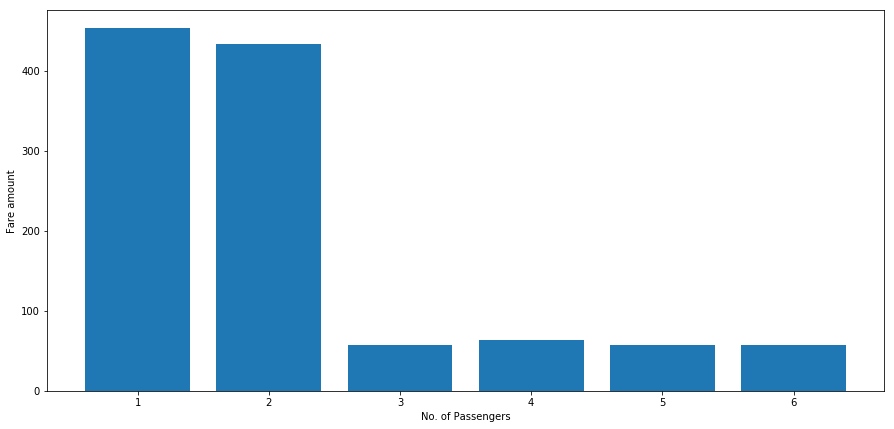

In [106]:
#Relationship between passengers and the fare amount
plt.figure(figsize=(15,7))
plt.bar(df_train['passenger_count'],df_train['fare_amount'])
plt.xlabel('No. of Passengers')
plt.ylabel('Fare amount')
plt.show()

We can conclude that 1(single) or 2(double) passengers contribute highest to the Fare amount.

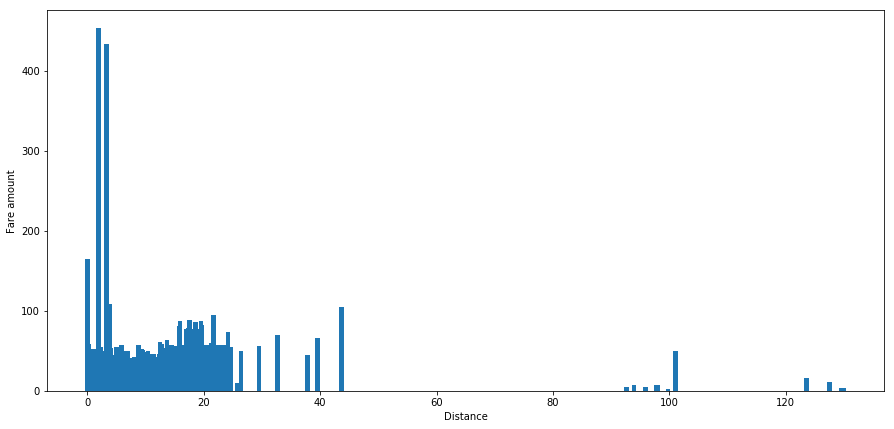

In [107]:
#Relationship between distance and fare amount
plt.figure(figsize=(15,7))
plt.bar(df_train['distance'], df_train['fare_amount'])
plt.xlabel('Distance')
plt.ylabel('Fare amount')
plt.show()

Distance and Fare amount are proportional and thus we can conclude that fare amount is related to the distance. However, in some cases, for short distances the cab fare is high and for long distances, cab fare is low. This might be due to other factors like peak time, high demand.

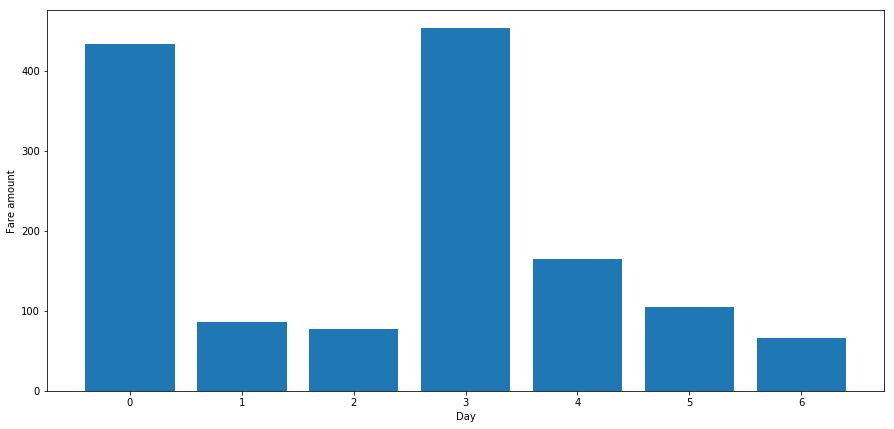

In [108]:
#Relationship between Day and Fare amount
plt.figure(figsize=(15,7))
plt.bar(df_train['pickup_day'], df_train['fare_amount'])
plt.xlabel('Day')
plt.ylabel('Fare amount')
plt.show()

Cab fare seems to be high on Sunday, Wednesday, Thursday. It might be due to high demand on weekend (sunday) and middle of the week (wednesday). It is low on Tuesday and Saturday comparetively and moderate on other days according to the demands.

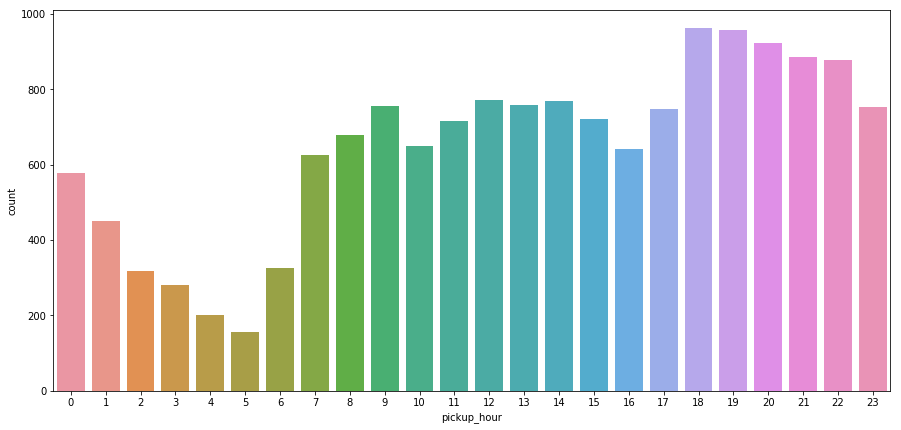

In [109]:
#impact of hour on the number of cab rides
plt.figure(figsize=(15,7))
sns.countplot(x="pickup_hour", data=df_train)

Maximum number of cabs are taken at 6PM and 7PM and the demand is lowest at 5AM. 

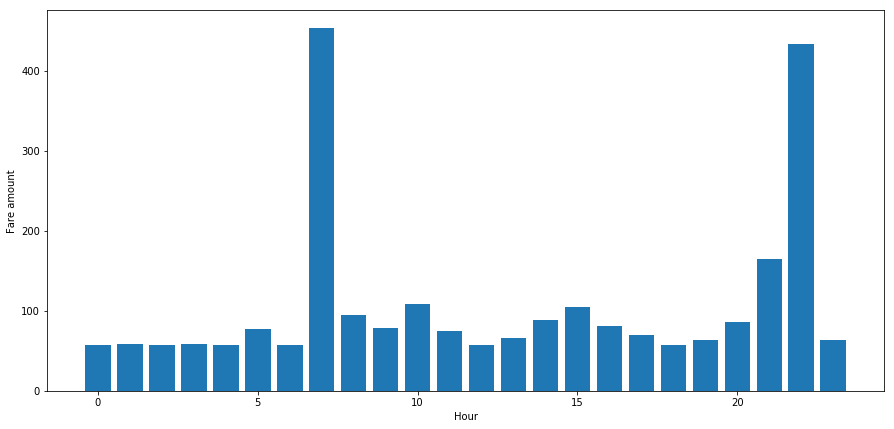

In [110]:
#Relationship between Time and Fare amount
plt.figure(figsize=(15,7))
plt.bar(df_train['pickup_hour'], df_train['fare_amount'])
plt.xlabel('Hour')
plt.ylabel('Fare amount')
plt.show()

We can conclude that cab rides taken in the early morning 7AM and in the late night 10PM are costlier. Thus early morning and late night rides are the costliest of all the rides.

###### Feature selection

Correlation Matrix:

We can find the correlation between fare_amount (target continuous variable) and independent continuous variables in training dataset using correlation matrix.

And if features are correlated with each other that could introduce bias into our models. Hence there should be no correlation between independent features and there should be high correlation between target and independent variables.

In [111]:
#to get numerical and categorical variables from training dataset
num_cols = df_train._get_numeric_data().columns
num_data = df_train[num_cols]
cat_cols = list(set(df_train)-set(num_cols))

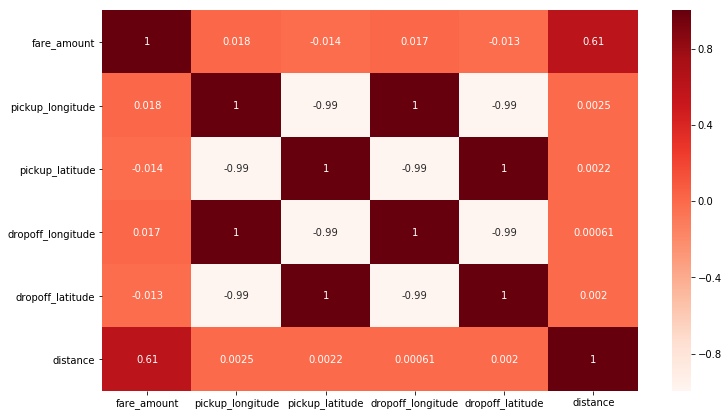

In [112]:
#to find the correlation between variables in training dataset
plt.figure(figsize=(12,7))
cor = num_data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [113]:
cor_target = abs(cor["fare_amount"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features

fare_amount    1.000000
distance       0.610022
Name: fare_amount, dtype: float64

Observations:

1. Now we have derived different variables like year, month etc from pickup_datetime variable and also we have calculated distance using pickup,dropoff latitude and longitude coordinates. 
2. Also, from correlation matrix we can see that distance is highly correlated with fare_amount(target variable) and pickup and dropoff latitudes and longitudes variables(dependent variables) are highly negatively correlated with each other. Hence, we can drop pickup_datetime, pickup, dropoff latitude and longitude variables.

ANOVA test:
    
We can find the correlation between fare_amount (target continuous variable) and independent categorical variables present in training dataset using ANOVA test of independence. It is compares the mean between each groups in a categorical variable.

Hypothesis of ANOVA testing :

Null Hypothesis: Mean of all categories in a variable are same and fare_amount doesn't depend on it.
Alternate Hypothesis: Mean of at least one category in a variable is different and fare_amount depends on it.
If p-value is less than 0.05 then we reject the null hypothesis.
And if p-value is greater than 0.05 then we accept the null hypothesis.

In [114]:
df_train['pickup_hour'].describe()

count     15500
unique       24
top          18
freq        961
Name: pickup_hour, dtype: int64

In [115]:
#one hot encoder
train = df_train
test = pd.DataFrame()
temp = pd.get_dummies(df_train['passenger_count'], prefix = 'passenger_count')
train = train.join(temp)
temp = pd.get_dummies(df_train['pickup_hour'], prefix = 'pickup_hour')
train = train.join(temp)
temp = pd.get_dummies(df_train['pickup_day'], prefix = 'pickup_day')
train = train.join(temp)
temp = pd.get_dummies(df_train['pickup_month'], prefix = 'pickup_month')
train = train.join(temp)
temp = pd.get_dummies(df_train['pickup_year'], prefix = 'pickup_year')
train = train.join(temp)
temp = pd.get_dummies(df_train['pickup_date'], prefix = 'pickup_date')
train = train.join(temp)
temp = pd.get_dummies(df_test['passenger_count'], prefix = 'passenger_count')
test = test.join(temp)
train

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance,pickup_year,pickup_month,pickup_date,...,pickup_date_22,pickup_date_23,pickup_date_24,pickup_date_25,pickup_date_26,pickup_date_27,pickup_date_28,pickup_date_29,pickup_date_30,pickup_date_31
0,4.500000,-73.844311,40.721319,-73.841610,40.712278,1,1.030764,2009,6,15,...,0,0,0,0,0,0,0,0,0,0
1,16.900000,-74.016048,40.711303,-73.979268,40.782004,1,8.450134,2010,1,5,...,0,0,0,0,0,0,0,0,0,0
2,5.700000,-73.982738,40.761270,-73.991242,40.750562,2,1.389525,2011,8,18,...,0,0,0,0,0,0,0,0,0,0
3,7.700000,-73.987130,40.733143,-73.991567,40.758092,1,2.799270,2012,4,21,...,0,0,0,0,0,0,0,0,0,0
4,5.300000,-73.968095,40.768008,-73.956655,40.783762,1,1.999157,2010,3,9,...,0,0,0,0,0,0,0,0,0,0
5,12.100000,-74.000964,40.731630,-73.972892,40.758233,1,3.787239,2011,1,6,...,0,0,0,0,0,0,0,0,0,0
6,7.500000,-73.980002,40.751662,-73.973802,40.764842,1,1.555807,2012,11,20,...,0,0,0,0,0,0,0,0,0,0
7,16.500000,-73.951300,40.774138,-73.990095,40.751048,1,4.155444,2012,1,4,...,0,0,0,0,0,0,0,0,0,0
8,6.011615,-74.006462,40.726713,-73.993078,40.731628,1,1.253232,2012,12,3,...,0,0,0,0,0,0,0,0,0,0
9,8.900000,-73.980658,40.733873,-73.991540,40.758138,2,2.849627,2009,9,2,...,0,0,0,0,0,0,0,0,0,0


In [116]:
#anova test for passenger_count,year of the rides
from statsmodels.formula.api import ols
model = ols('fare_amount ~ C(passenger_count_1)+C(passenger_count_2)+C(passenger_count_3)+C(passenger_count_4)+C(passenger_count_5)+C(passenger_count_6)+C(pickup_year_2009)+C(pickup_year_2010)+C(pickup_year_2011)+C(pickup_year_2012)+C(pickup_year_2013)+C(pickup_year_2014)+C(pickup_year_2015)',data=train).fit()
aov_table = sm.stats.anova_lm(model)
aov_table

,df,sum_sq,mean_sq,F,PR(>F)
C(passenger_count_1),1.0,1.430183e+03,1430.183134,12.731550,3.606246e-04
C(passenger_count_2),1.0,1.291406e+03,1291.406430,11.496154,6.991451e-04
C(passenger_count_3),1.0,5.667920e+01,56.679199,0.504561,4.775138e-01
C(passenger_count_4),1.0,9.245481e+00,9.245481,0.082304,7.742033e-01
C(passenger_count_5),1.0,2.188917e+01,21.889170,0.194858,6.589097e-01
C(passenger_count_6),1.0,5.592676e+01,55.926765,0.497862,4.804515e-01
C(pickup_year_2009),1.0,4.043753e+03,4043.752535,35.997653,2.019562e-09
C(pickup_year_2010),1.0,7.295174e+03,7295.174451,64.941946,8.272763e-16
C(pickup_year_2011),1.0,4.854100e+03,4854.100265,43.211402,5.070401e-11
C(pickup_year_2012),1.0,2.444161e+03,2444.160503,21.758018,3.118800e-06


We can reject null hypothesis as fare_amount is dependent on the passenger_count and pickup_year. Similar test can be run on other independent variables as well.

In [117]:
#Dropping above mentioned variables from training dataset after analyzing all the variables
dropvar_train = ['pickup_longitude', 'pickup_latitude','dropoff_longitude', 'dropoff_latitude','pickup_date']
df_train = df_train.drop(dropvar_train, axis = 1)

In [118]:
df_train.dtypes

fare_amount         float64
passenger_count    category
distance            float64
pickup_year        category
pickup_month       category
pickup_day         category
pickup_hour        category
dtype: object

In [119]:
#Dropping above mentioned variables from test dataset
dropvar_test = ['pickup_datetime', 'pickup_longitude', 'pickup_latitude','dropoff_longitude', 'dropoff_latitude','pickup_date']
df_test = df_test.drop(dropvar_test, axis = 1)

In [120]:
df_test.dtypes

passenger_count    category
distance            float64
pickup_year        category
pickup_month       category
pickup_day         category
pickup_hour        category
dtype: object

#### Feature Scaling

As the continuous variables, distance and fare_amount are varying in units and range,we can scale them before applying machine learning algorithms on them. We can perform normality check on variables to determine which method to be used to scale.

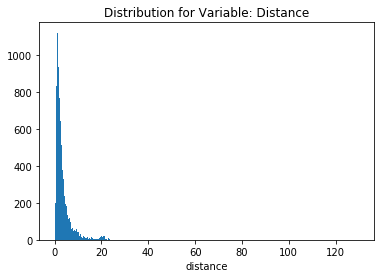

In [121]:
#plot histogram to check for distribution of distance variable in training dataset(normality check)
%matplotlib inline
plt.hist(df_train['distance'],bins='auto')
plt.title("Distribution for Variable: Distance")
plt.xlabel("distance")
plt.show()

As the distribution of distance variable is right skewed, we can use log transformation to change the distribution.

In [122]:
df_train['distance'] = np.log1p(df_train['distance'])

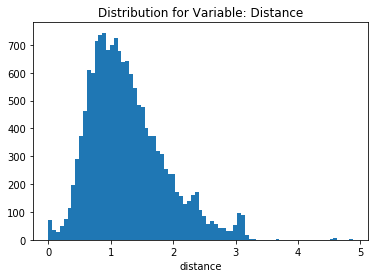

In [123]:
#check distribution after applying log transform method
%matplotlib inline
plt.hist(df_train['distance'],bins='auto')
plt.title("Distribution for Variable: Distance")
plt.xlabel("distance")
plt.show()

In [124]:
df_train.head()

,fare_amount,passenger_count,distance,pickup_year,pickup_month,pickup_day,pickup_hour
0,4.5,1,0.708412,2009,6,0,17
1,16.9,1,2.246029,2010,1,1,16
2,5.7,2,0.871095,2011,8,3,0
3,7.7,1,1.334809,2012,4,5,4
4,5.3,1,1.098331,2010,3,1,7


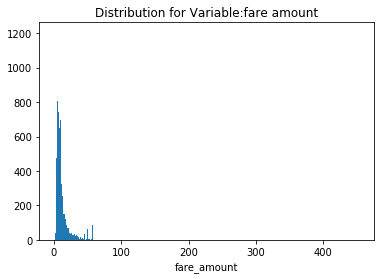

In [125]:
#plot histogram to check for distribution of fare_amount variable in training dataset 
%matplotlib inline
plt.hist(df_train['fare_amount'],bins='auto')
plt.title("Distribution for Variable:fare amount")
plt.xlabel("fare_amount")
plt.show()

In [126]:
#As the distribution of distance is right skewed, we can use log transformation to change the distribution
df_train['fare_amount'] = np.log1p(df_train['fare_amount'])

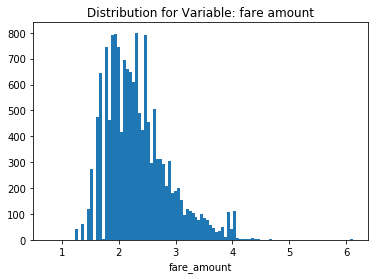

In [127]:
#check distribution after applying log transform method
%matplotlib inline
plt.hist(df_train['fare_amount'],bins='auto')
plt.title("Distribution for Variable: fare amount")
plt.xlabel("fare_amount")
plt.show()

In [128]:
df_train.head()

,fare_amount,passenger_count,distance,pickup_year,pickup_month,pickup_day,pickup_hour
0,1.704748,1,0.708412,2009,6,0,17
1,2.884801,1,2.246029,2010,1,1,16
2,1.902108,2,0.871095,2011,8,3,0
3,2.163323,1,1.334809,2012,4,5,4
4,1.840550,1,1.098331,2010,3,1,7


As the variables are nearly normally distributed, we need not use any feature scaling technique. 

## Applying Machine Learning algorithms

We can split training data into train and test datasets. Training dataset is used for building training model and test dataset is for validating our model. This is done to understand the robustness, accuracy and performance of the model built.  

In [129]:
#Obtain test and training dataset 
X_train, X_test, Y_train, Y_test = train_test_split(df_train.iloc[:, df_train.columns != 'fare_amount'],df_train.iloc[:,0],test_size=0.2)

In [130]:
df_train.iloc[:,0]

0        1.704748
1        2.884801
2        1.902108
3        2.163323
4        1.840550
5        2.572612
6        2.140066
7        2.862201
8        1.947568
9        2.292535
10       1.840550
12       1.629241
13       2.079442
14       2.163323
16       2.602690
17       1.840550
18       1.840550
19       1.609438
20       2.442347
21       2.525729
22       1.704748
23       1.774952
24       1.960095
25       2.116256
27       1.704748
28       2.332144
29       1.704748
30       1.871802
31       3.158701
32       3.493473
           ...   
16036    2.442347
16037    2.014903
16038    1.902108
16039    2.631889
16040    2.014903
16041    2.484907
16042    2.251292
16043    2.251292
16044    2.862201
16045    2.014903
16046    1.945910
16047    1.960095
16048    2.370244
16049    2.815409
16050    2.251292
16051    2.525729
16052    2.397895
16053    1.609438
16054    1.840550
16055    3.897924
16057    1.791759
16058    1.871802
16059    1.840550
16060    3.135494
16061    2

In [131]:
#Dimensions of training dataset
print(X_train.shape)
print(Y_train.shape)

(12400, 6)
(12400,)


In [132]:
#Dimensions of test dataset
print(X_test.shape)
print(Y_test.shape)

(3100, 6)
(3100,)


In [133]:
df_train.isnull().sum()

fare_amount        0
passenger_count    0
distance           0
pickup_year        0
pickup_month       0
pickup_day         0
pickup_hour        0
dtype: int64

In [134]:
df_train.dtypes

fare_amount         float64
passenger_count    category
distance            float64
pickup_year        category
pickup_month       category
pickup_day         category
pickup_hour        category
dtype: object

#### Decision tree Model

In [135]:
#Building decision tree model on training dataset
dt_model = DecisionTreeRegressor(max_depth=2).fit(X_train,Y_train)

In [136]:
dt_model

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [137]:
#Predict target values on training and test dataset
Ypred_train_DT = dt_model.predict(X_train)
Ypred_test_DT = dt_model.predict(X_test)

After having built a model, we have to measure how accurately the model predicts the response. RMSE (Root Mean Square Error)is one of the good measures and criterion for fit for prediction models.

In [138]:
#Calculating RMSE values for training and test dataset
RMSE_train_DT = np.sqrt(mean_squared_error(Y_train, Ypred_train_DT))
RMSE_test_DT = np.sqrt(mean_squared_error(Y_test, Ypred_test_DT))

In [139]:
print(RMSE_train_DT)

0.29917488139714815


In [140]:
print(RMSE_test_DT)

0.2870490387730227


In [141]:
#R^2 calculation for train data
r2_score(Y_train, Ypred_train_DT)

0.7022392848225799

In [142]:
#R^2 calculation for test data
r2_score(Y_test, Ypred_test_DT)

0.7094647936381453

#### Random Forest

In [143]:
#Building random forest model on training dataset
rf_model = RandomForestRegressor(n_estimators = 200).fit(X_train,Y_train)

In [144]:
#Predict target values on training and test dataset
Ypred_train_RF = rf_model.predict(X_train)
Ypred_test_RF = rf_model.predict(X_test)

In [145]:
#calculating RMSE for training and test dataset
RMSE_train_RF = np.sqrt(mean_squared_error(Y_train, Ypred_train_RF))
RMSE_test_RF = np.sqrt(mean_squared_error(Y_test, Ypred_test_RF))

In [146]:
print(RMSE_train_RF)

0.09444589695496972


In [147]:
print(RMSE_test_RF)

0.24154330000935686


In [148]:
#R^2 (coefficient of determination) regression score function for training data
r2_score(Y_train, Ypred_train_RF)

0.9703255051441103

In [149]:
#R^2 (coefficient of determination) regression score function for test data
r2_score(Y_test, Ypred_test_RF)

0.79427997723655

#### Gradient Boosting Algorithm

In [150]:
#Build Gradient Boosting Model on trainig dataset
gbm_model = GradientBoostingRegressor().fit(X_train,Y_train)

In [151]:
#Predict target values on training and test dataset
Ypred_train_GBM = gbm_model.predict(X_train)
Ypred_test_GBM = gbm_model.predict(X_test)

In [152]:
#calculating RMSE for training and test dataset
RMSE_train_GBM = np.sqrt(mean_squared_error(Y_train, Ypred_train_GBM))
RMSE_test_GBM = np.sqrt(mean_squared_error(Y_test, Ypred_test_GBM))

In [153]:
print(RMSE_train_GBM)

0.2282495076939397


In [154]:
print(RMSE_test_GBM)

0.23026052516427864


In [155]:
#Calculating R^2 for training data
r2_score(Y_train,Ypred_train_GBM)

0.8266847241143006

In [156]:
#Calculating R^2 for test data
r2_score(Y_test,Ypred_test_GBM)

0.8130499633840733

Thus, the R^2 values of test dataset are nearly same for Random Forest model and Gradient Boosting model, we can optimize them for better results. 

# Optimizing models using Hyperparameter tuning

Choosing the right set of hyperparameters values is “Hyperparameter optimization” or “Hyperparameter tuning”.The right choice of hyperparameter values affect the performance of a machine learning model. 

In [157]:
#to get parameters currently used in random forest model 
rf = RandomForestRegressor(random_state = 42)
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 'warn',
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [158]:
#to get parameters currently used in GradientBoosting model 
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor(random_state = 42)
print('Parameters currently in use:\n')
pprint(gb.get_params())

Parameters currently in use:

{'alpha': 0.9,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'ls',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'presort': 'auto',
 'random_state': 42,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}


Hyperparameter optimization/tuning stratergies used are:
1. Grid Search 
2. Random Search.

Grid Search is an approach to hyperparameter tuning that will methodically build and evaluate a model for each combination of algorithm parameters specified in a grid.

In Random Search, a statistical distribution for each hyperparameter is provided from which values may be randomly sampled.

Grid searching of parameters:

In [159]:
#GridSearchCV for Random Forest model

n_estimator = [200,300,500]
max_depth = [2,3,4,5,6,7]

#setting grid parameters
param_grid = {'n_estimators':n_estimator,
             'max_depth': max_depth}

grid = GridSearchCV(estimator=RandomForestRegressor(random_state=0), param_grid=param_grid, cv = 5)

grid_result = grid.fit(X_train, Y_train)

#Apply model on test data
predictions_GRF = grid_result.predict(X_test)

#Calculating R^2
GRF_r2 = r2_score(Y_test, predictions_GRF)
#Calculating RMSE
GRF_rmse = np.sqrt(mean_squared_error(Y_test,predictions_GRF))

# Summarize results
print("R-Squared value is: %f using best parameters: %s" % (GRF_r2, grid_result.best_params_))
print("RMSE value is: ",(GRF_rmse))

R-Squared value is: 0.805550 using best parameters: {'max_depth': 7, 'n_estimators': 300}
RMSE value is:  0.23483410122333476


In [161]:
#GridSearchCV for GradientBoosting model

n_estimator = [200,500]
max_depth = [2,3,4,5,6,7]

#setting grid parameters
param_grid = {'n_estimators':n_estimator,
             'max_depth': max_depth}

grid = GridSearchCV(estimator=GradientBoostingRegressor(random_state=0), param_grid=param_grid, cv = 5)

grid_result = grid.fit(X_train, Y_train)

#Apply model on test data
predictions_GGB = grid_result.predict(X_test)

#Calculating R^2
GGB_r2 = r2_score(Y_test, predictions_GGB)
#Calculating RMSE
GGB_rmse = np.sqrt(mean_squared_error(Y_test,predictions_GGB))


# Summarize results
print("R-Squared value is: %f using %s" % (GGB_r2, grid_result.best_params_))
print("RMSE value is: ",(GGB_rmse))

R-Squared value is: 0.811970 using {'max_depth': 2, 'n_estimators': 200}
RMSE value is:  0.23092482473629614


Random Searching of parameters:

In [162]:
#RandomSearchCV for Random Forest model

n_estimator = [200,500]
max_depth = [2,3,4,5,6,7]

#setting grid parameters
param_random = {'n_estimators':n_estimator,
             'max_depth': max_depth}

random = RandomizedSearchCV(estimator=RandomForestRegressor(random_state=0), param_distributions=param_random, n_iter = 5, cv = 5)

random_result = random.fit(X_train, Y_train)

#Apply model on test data
predictions_RRF = random_result.predict(X_test)

#Calculating R^2
RRF_r2 = r2_score(Y_test, predictions_RRF)
#Calculating RMSE
RRF_rmse = np.sqrt(mean_squared_error(Y_test,predictions_RRF))


# Summarize results
print("R-Squared value is: %f using %s" % (RRF_r2, random_result.best_params_))
print("RMSE value is: ",(RRF_rmse))

R-Squared value is: 0.802605 using {'n_estimators': 500, 'max_depth': 6}
RMSE value is:  0.23660550833852217


In [163]:
#RandomSearchCV for GradientBoosting model

n_estimator = [200,500]
max_depth = [2,3,4,5,6,7]

#setting grid parameters
param_random = {'n_estimators':n_estimator,
             'max_depth': max_depth}

random = RandomizedSearchCV(estimator=GradientBoostingRegressor(random_state=0), param_distributions=param_random, n_iter = 5, cv = 5)

random_result = random.fit(X_train, Y_train)

#Apply model on test data
predictions_RGB = random_result.predict(X_test)

#Calculating R^2
RGB_r2 = r2_score(Y_test, predictions_RGB)
#Calculating RMSE
RGB_rmse = np.sqrt(mean_squared_error(Y_test,predictions_RGB))


# Summarize results
print("R-Squared value is: %f using %s" % (RGB_r2, random_result.best_params_))
print("RMSE value is: ",(RGB_rmse))

R-Squared value is: 0.800981 using {'n_estimators': 500, 'max_depth': 3}
RMSE value is:  0.23757685109984522


Hence, by optimizing Random Forest and Gradient Boosting models using GridSearchCV and RandomizedSearchCV algorithms, we can conclude that GridSearchCV for Gradient Boosting Model yields maximum R^2 value. We can predict test dataset using GridSearchCV for Gradient Boosting Model.  

# Prediction of fare amount for test dataset 

In [164]:
#GridSearchCV for GradientBoosting model

n_estimator = [200,500]
max_depth = [2,3,4,5,6,7]

#setting grid parameters
param_grid = {'n_estimators':n_estimator,
             'max_depth': max_depth}

grid = GridSearchCV(estimator=GradientBoostingRegressor(random_state=0), param_grid=param_grid, cv = 5)

grid_result = grid.fit(X_train, Y_train)

#Apply model on test data
predictions_test_GGB = grid_result.predict(df_test)

In [165]:
predictions_test_GGB

array([3.40319871, 3.52117909, 1.81120044, ..., 2.15171495, 2.07364651,
       2.32648872])

In [166]:
#adding predicted fare amount to test dataset
df_test['Predicted_fare_amount'] = predictions_test_GGB

In [167]:
df_test.head(10)

,passenger_count,distance,pickup_year,pickup_month,pickup_day,pickup_hour,Predicted_fare_amount
0,1,2.323259,2015,1,1,13,3.403199
1,1,2.425353,2015,1,1,13,3.521179
2,1,0.618628,2011,10,5,11,1.811200
3,1,1.961033,2012,12,5,21,2.885995
4,1,5.387301,2012,12,5,21,2.136488
5,1,3.222549,2012,12,5,21,3.921769
6,1,0.929601,2011,10,3,12,2.075280
7,1,21.540102,2011,10,3,12,1.967344
8,1,3.873962,2011,10,3,12,3.995708
9,1,1.099794,2014,2,1,15,2.308311


In [ ]:
df_train.head(10)